# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS-109A Introduction to Data Science

## Lab 10:  Neural Networks using `keras` 

**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors:** Pavlos Protopapas and Kevin Rader<br/>
**Lab Instructor:** Eleni Kaxiras<br/>
**Authors:** David Sondak, Eleni Kaxiras, and Pavlos Protopapas

In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get\
    ("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%matplotlib inline

## Anatomy of an Artificial Neural Network

In a previous lab we created our own neural network by writing some simple python functions.  We focused on a regression problem where we tried to learn a function. We practiced using the logistic activation function in a network with multiple nodes, but a single or two hidden layers.  Some of the key observations were:
* Increasing the number of nodes allows us to represent more complicated functions  
* The weights and biases have a very big impact on the solution
* Finding the "correct" weights and biases is really hard to do manually
* There must be a better method for determining the weights and biases automatically

We also didn't assess the effects of different activation functions or different network depths. 

### The 3 parts of an ANN

- **Part 1: the input layer** (dimentions are determined from our dataset)
- **Part 2: the internal architecture or hidden layers** (the number of layers, the activation functions, the learnable parameters and other hyperparameters)
- **Part 3: the output layer** (what we want from the network)

### A word about .npy files

Numpy arrays are faster than plain python lists, as we know. Numpy also offers a file format called .npy, which, when it comes to reading the same data multiple times from disk storage, is a lot faster than reading from a csv file. You can save any list or array into this format.

In [3]:
np.save('/tmp/123', np.array([[1, 2, 3], [4, 5, 6]]))
hello = np.load('/tmp/123.npy')

In [4]:
hello

array([[1, 2, 3],
       [4, 5, 6]])

## `Keras` Basics ![](figs/keras.png)
https://keras.io/

Machine learning computations can be quite demanding. TensorFlow is a framework for representing complicated ML algorithms and executing them in any platform, from a phone to a distributed system using GPUs. Developed by Google Brain, TensorFlow is used very broadly today. 

**[`keras`](https://keras.io/)**, is a high-level API used for fast prototyping, advanced research, and production. We will use `tf.keras` which is TensorFlow's implementation of the `keras` API.

### Models are assemblies of layers

The core data structure of Keras is a **model**, a way to organize layers. A model is understood as a sequence or a graph of standalone, fully-configurable modules that can be plugged together with as few restrictions as possible. In particular, neural layers, cost functions, optimizers, initialization schemes, activation functions, regularization schemes are all standalone modules that you can combine to create new models.

The simplest type of model is the **Sequential** model, a linear stack of layers. For more complex architectures, one can use the Keras **Functional** API, which allows to build arbitrary graphs of layers.

https://keras.io/models/model/

Everything you need to know about the Sequential model is here: https://keras.io/models/sequential/

### Keras Installation

If you haven't already, install `Keras` using the instructions found at [https://keras.io/#installation](https://keras.io/#installation)

Choose the TensorFlow installation instructions (found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/) ).

### Example: Approximating a Gaussian using keras
Let's try to redo the problem from last week.  Recall that we had a function

$$
\begin{aligned}
f\left(x\right) = e^{-x^{2}}
\end{aligned}
$$

and we wanted to use a neural network to approximate that function.  This week, we will use `keras` to do the true optimization.

First, we import the necessary `keras` modules.

In [5]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

print(tf.VERSION)
print(tf.keras.__version__)

/Users/winniewang/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0
2.1.6-tf


In [6]:
# Checking if our machine has GPUs. Mine does not..
with tf.Session() as sess:
    devices = sess.list_devices()
    print(devices)

[_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456, 13810696059528186261)]


Before we get started, we need to create some **data**.  We will generate data points from an underlying function (here the Guassian).  Then we will use the `sklearn` `train_test_split` method to split the dataset into training and testing portions.  Remember that we train a machine learning algorithm on the training set and then assess the algorithm's performance on the test set.

In [28]:
from sklearn.model_selection import train_test_split

n_samples = 1050 # set the number of samples to take for each dataset
test_size = 0.3 # set the proportion of data to hold out for testing

# define the function and add noise

def f_gauss(x):
    return np.exp(-x * x) + np.random.normal(loc=0, scale=.1, size = x.shape[0])

X = np.random.permutation(np.linspace(-10, 10, n_samples)) # choose some points from the function
Y = f_gauss(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

Let's plot the data

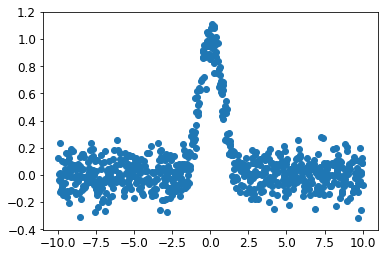

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train)

### Building a keras network

Now we will create a neural network model with keras. We're going to use a single layer and just 2 neurons in that layer. We will start with the sigmoid activation function. We also choose a linear output layer since we are doing regression. The loss function is selected to be the **mean squared error (MSE)**. In addition to these choices we must also specify our initial weights as well as the optimization method that will be used to minimize the loss function. The keras interface has many choises as to those hyperparameters.

**Part 1:** First we start by defining the number of nodes in a layer and the input dimensions. If we have more than one layer we might need to define a value for the number of nodes (H) for each layer.

`H = 
input_dim =`

Then we instantiate the model

`model = models.Sequential() `

**Part 2:** Then we add the hidden layers. Adding layers and stacking them is done using `.add()`

`model.add(layers.Dense(H, input_dim=input_dim,  
                activation='sigmoid')) `

**An alternative way** 

`model = Sequential([
    Dense(200, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(4, activation='linear')
])`

**Part 3:** We end with the final layer (output)

`model.add(layers.Dense(1, 
                activation='linear')) `
                
Our model is not ready yet. We need to configure its learning process with .compile():

`model.compile(loss='mean_squared_error', optimizer='sgd')`

If you need to, you can further configure your optimizer. A core principle of Keras is to make things reasonably simple, while allowing the user to be fully in control when they need to (the ultimate control being the easy extensibility of the source code)

`model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01))`
              
Our model is now ready to use. We haven't trained it yet, but we'll do that now using the fit method. Notice that we also need to specify the batch size for the stochastic gradient decent algorithm as well as the number of epochs to run.

`model.fit(X_train, Y_train, batch_size=100, epochs=100)#, verbose=1)`

<div class="exercise"><b>Exercise 1:</b> </div>

Build a NN with one hidden layer with **2 neurons**. Use the `tanh` activation function. Train the model using the X_train dataset from above (train the model in this case means run `.compile` and `.fit`).

In [ ]:
# your code here


In [31]:
# %load solutions/NN_1_layer_2_nodes.py
H = 2 # number of nodes in the layer
input_dim = 1 # input dimension: just x

model = models.Sequential() # create sequential multi-layer perceptron

# our first hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                activation='tanh')) 
# layer 1
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model_history = model.fit(X_train, Y_train, batch_size=100, epochs=100, verbose=1)


Epoch 1/100
735/735 [==============================] - 0s 644us/step - loss: 0.0736
Epoch 2/100
735/735 [==============================] - 0s 16us/step - loss: 0.0712
Epoch 3/100
735/735 [==============================] - 0s 15us/step - loss: 0.0694
Epoch 4/100
735/735 [==============================] - 0s 18us/step - loss: 0.0679
Epoch 5/100
735/735 [==============================] - 0s 22us/step - loss: 0.0668
Epoch 6/100
735/735 [==============================] - 0s 16us/step - loss: 0.0661
Epoch 7/100
735/735 [==============================] - 0s 24us/step - loss: 0.0655
Epoch 8/100
735/735 [==============================] - 0s 28us/step - loss: 0.0650
Epoch 9/100
735/735 [==============================] - 0s 25us/step - loss: 0.0647
Epoch 10/100
735/735 [==============================] - 0s 14us/step - loss: 0.0644
Epoch 11/100
735/735 [==============================] - 0s 16us/step - loss: 0.0641
Epoch 12/100
735/735 [==============================] - 0s 16us/step - loss: 0.0639


735/735 [==============================] - 0s 15us/step - loss: 0.0173
Epoch 99/100
735/735 [==============================] - 0s 18us/step - loss: 0.0171
Epoch 100/100
735/735 [==============================] - 0s 19us/step - loss: 0.0168


Great!  We've trained a model.  Now it's time to explore the results.  Notice the loss function.

In [11]:
# Some constants for our plots
FIG_SIZE = (10,5)
FONT_SIZE = 10
LABEL_SIZE = 15

In [12]:
# use our model to predict in the range we want
X_range = np.linspace(-10, 10, 1000)
y_pred = model.predict(X_range)

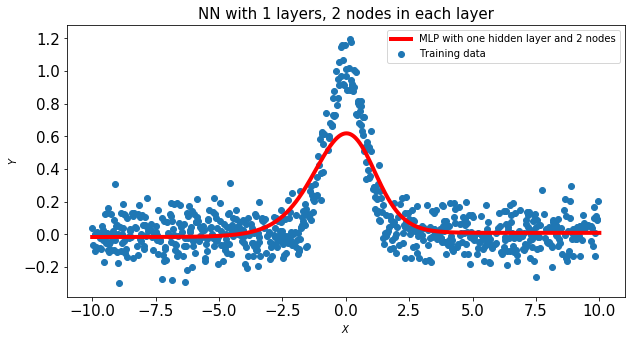

In [13]:
# Plot the results
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'MLP with one hidden layer and {H} nodes')
ax.set_xlabel(r'$X$', fontsize=FONT_SIZE)
ax.set_ylabel(r'$Y$', fontsize=FONT_SIZE)
ax.set_title(f'NN with {len(model_history.model.layers)-1} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=LABEL_SIZE)

ax.legend(loc=0, fontsize=FONT_SIZE)

plt.show()

<div class="exercise"><b>Exercise 2:</b></div>

Change the number of neurons in the layer. Try changing the activation function to `reLU`.  Can you get better results?  What worked the best?

In [ ]:
# your code here


In [32]:
# %load solutions/NN_1_layer_16_nodes.py

H = 40 # number of nodes in the layer
input_dim = 1 # input dimension: just x

model2 = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model2.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='relu')) 
# layer 1
model2.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# compile the model
model2.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model2_history = model2.fit(X_train, Y_train, batch_size=256, epochs=1200, verbose=1, \
                          shuffle = True, validation_split=0.5)


Train on 367 samples, validate on 368 samples
Epoch 1/1200
367/367 [==============================] - 0s 1ms/step - loss: 0.0834 - val_loss: 0.0671
Epoch 2/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0806 - val_loss: 0.0649
Epoch 3/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0784 - val_loss: 0.0633
Epoch 4/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0767 - val_loss: 0.0623
Epoch 5/1200
367/367 [==============================] - 0s 23us/step - loss: 0.0758 - val_loss: 0.0617
Epoch 6/1200
367/367 [==============================] - 0s 23us/step - loss: 0.0752 - val_loss: 0.0613
Epoch 7/1200
367/367 [==============================] - 0s 30us/step - loss: 0.0749 - val_loss: 0.0610
Epoch 8/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0745 - val_loss: 0.0606
Epoch 9/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0741 - val_loss: 0.0601
Epoch 10/1200
367/367 [=====

367/367 [==============================] - 0s 19us/step - loss: 0.0400 - val_loss: 0.0361
Epoch 80/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0399 - val_loss: 0.0360
Epoch 81/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0398 - val_loss: 0.0359
Epoch 82/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0395 - val_loss: 0.0358
Epoch 83/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0395 - val_loss: 0.0358
Epoch 84/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0394 - val_loss: 0.0357
Epoch 85/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0392 - val_loss: 0.0356
Epoch 86/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0392 - val_loss: 0.0356
Epoch 87/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0391 - val_loss: 0.0354
Epoch 88/1200
367/367 [==============================] - 0s 21us/step - loss: 

367/367 [==============================] - 0s 23us/step - loss: 0.0340 - val_loss: 0.0317
Epoch 157/1200
367/367 [==============================] - 0s 30us/step - loss: 0.0338 - val_loss: 0.0317
Epoch 158/1200
367/367 [==============================] - 0s 32us/step - loss: 0.0338 - val_loss: 0.0317
Epoch 159/1200
367/367 [==============================] - 0s 25us/step - loss: 0.0338 - val_loss: 0.0316
Epoch 160/1200
367/367 [==============================] - 0s 23us/step - loss: 0.0337 - val_loss: 0.0316
Epoch 161/1200
367/367 [==============================] - 0s 30us/step - loss: 0.0337 - val_loss: 0.0316
Epoch 162/1200
367/367 [==============================] - 0s 21us/step - loss: 0.0337 - val_loss: 0.0314
Epoch 163/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0335 - val_loss: 0.0313
Epoch 164/1200
367/367 [==============================] - 0s 26us/step - loss: 0.0335 - val_loss: 0.0313
Epoch 165/1200
367/367 [==============================] - 0s 24us/step

367/367 [==============================] - 0s 16us/step - loss: 0.0303 - val_loss: 0.0285
Epoch 235/1200
367/367 [==============================] - 0s 23us/step - loss: 0.0303 - val_loss: 0.0286
Epoch 236/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0303 - val_loss: 0.0285
Epoch 237/1200
367/367 [==============================] - 0s 28us/step - loss: 0.0302 - val_loss: 0.0284
Epoch 238/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0302 - val_loss: 0.0283
Epoch 239/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0302 - val_loss: 0.0283
Epoch 240/1200
367/367 [==============================] - 0s 24us/step - loss: 0.0301 - val_loss: 0.0284
Epoch 241/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0301 - val_loss: 0.0284
Epoch 242/1200
367/367 [==============================] - 0s 24us/step - loss: 0.0301 - val_loss: 0.0283
Epoch 243/1200
367/367 [==============================] - 0s 20us/step

367/367 [==============================] - 0s 17us/step - loss: 0.0272 - val_loss: 0.0257
Epoch 313/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0271 - val_loss: 0.0257
Epoch 314/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0272 - val_loss: 0.0257
Epoch 315/1200
367/367 [==============================] - 0s 23us/step - loss: 0.0271 - val_loss: 0.0257
Epoch 316/1200
367/367 [==============================] - 0s 25us/step - loss: 0.0270 - val_loss: 0.0257
Epoch 317/1200
367/367 [==============================] - 0s 21us/step - loss: 0.0271 - val_loss: 0.0257
Epoch 318/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0270 - val_loss: 0.0256
Epoch 319/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0270 - val_loss: 0.0256
Epoch 320/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0269 - val_loss: 0.0255
Epoch 321/1200
367/367 [==============================] - 0s 18us/step

367/367 [==============================] - 0s 21us/step - loss: 0.0244 - val_loss: 0.0232
Epoch 390/1200
367/367 [==============================] - ETA: 0s - loss: 0.024 - 0s 33us/step - loss: 0.0245 - val_loss: 0.0231
Epoch 391/1200
367/367 [==============================] - 0s 29us/step - loss: 0.0244 - val_loss: 0.0231
Epoch 392/1200
367/367 [==============================] - ETA: 0s - loss: 0.027 - 0s 29us/step - loss: 0.0244 - val_loss: 0.0231
Epoch 393/1200
367/367 [==============================] - 0s 32us/step - loss: 0.0244 - val_loss: 0.0230
Epoch 394/1200
367/367 [==============================] - 0s 29us/step - loss: 0.0243 - val_loss: 0.0230
Epoch 395/1200
367/367 [==============================] - 0s 28us/step - loss: 0.0244 - val_loss: 0.0230
Epoch 396/1200
367/367 [==============================] - 0s 30us/step - loss: 0.0242 - val_loss: 0.0230
Epoch 397/1200
367/367 [==============================] - 0s 26us/step - loss: 0.0242 - val_loss: 0.0231
Epoch 398/1200
367/367

367/367 [==============================] - 0s 17us/step - loss: 0.0219 - val_loss: 0.0214
Epoch 467/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0221 - val_loss: 0.0215
Epoch 468/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0222 - val_loss: 0.0211
Epoch 469/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0220 - val_loss: 0.0212
Epoch 470/1200
367/367 [==============================] - 0s 21us/step - loss: 0.0219 - val_loss: 0.0210
Epoch 471/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0218 - val_loss: 0.0212
Epoch 472/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0220 - val_loss: 0.0211
Epoch 473/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0218 - val_loss: 0.0210
Epoch 474/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0220 - val_loss: 0.0210
Epoch 475/1200
367/367 [==============================] - 0s 19us/step

Epoch 544/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0199 - val_loss: 0.0192
Epoch 545/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0199 - val_loss: 0.0191
Epoch 546/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0198 - val_loss: 0.0192
Epoch 547/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0199 - val_loss: 0.0191
Epoch 548/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0197 - val_loss: 0.0191
Epoch 549/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0198 - val_loss: 0.0191
Epoch 550/1200
367/367 [==============================] - 0s 23us/step - loss: 0.0197 - val_loss: 0.0191
Epoch 551/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0197 - val_loss: 0.0191
Epoch 552/1200
367/367 [==============================] - 0s 21us/step - loss: 0.0197 - val_loss: 0.0191
Epoch 553/1200
367/367 [==============================]

Epoch 622/1200
367/367 [==============================] - 0s 23us/step - loss: 0.0180 - val_loss: 0.0178
Epoch 623/1200
367/367 [==============================] - 0s 26us/step - loss: 0.0182 - val_loss: 0.0177
Epoch 624/1200
367/367 [==============================] - 0s 26us/step - loss: 0.0181 - val_loss: 0.0176
Epoch 625/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0180 - val_loss: 0.0176
Epoch 626/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0180 - val_loss: 0.0177
Epoch 627/1200
367/367 [==============================] - 0s 26us/step - loss: 0.0181 - val_loss: 0.0176
Epoch 628/1200
367/367 [==============================] - 0s 27us/step - loss: 0.0180 - val_loss: 0.0177
Epoch 629/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0181 - val_loss: 0.0176
Epoch 630/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0179 - val_loss: 0.0176
Epoch 631/1200
367/367 [==============================]

367/367 [==============================] - 0s 21us/step - loss: 0.0166 - val_loss: 0.0163
Epoch 701/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0165 - val_loss: 0.0163
Epoch 702/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0166 - val_loss: 0.0163
Epoch 703/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0165 - val_loss: 0.0163
Epoch 704/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0165 - val_loss: 0.0165
Epoch 705/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0166 - val_loss: 0.0163
Epoch 706/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0165 - val_loss: 0.0164
Epoch 707/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0165 - val_loss: 0.0164
Epoch 708/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0165 - val_loss: 0.0164
Epoch 709/1200
367/367 [==============================] - 0s 19us/step

367/367 [==============================] - 0s 16us/step - loss: 0.0153 - val_loss: 0.0153
Epoch 778/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0153 - val_loss: 0.0152
Epoch 779/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0153 - val_loss: 0.0153
Epoch 780/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0153 - val_loss: 0.0152
Epoch 781/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0152 - val_loss: 0.0152
Epoch 782/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0152 - val_loss: 0.0153
Epoch 783/1200
367/367 [==============================] - 0s 21us/step - loss: 0.0153 - val_loss: 0.0152
Epoch 784/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0152 - val_loss: 0.0153
Epoch 785/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0151 - val_loss: 0.0153
Epoch 786/1200
367/367 [==============================] - 0s 15us/step

367/367 [==============================] - 0s 23us/step - loss: 0.0143 - val_loss: 0.0144
Epoch 856/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0143 - val_loss: 0.0144
Epoch 857/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0142 - val_loss: 0.0143
Epoch 858/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0142 - val_loss: 0.0144
Epoch 859/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0142 - val_loss: 0.0143
Epoch 860/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0142 - val_loss: 0.0143
Epoch 861/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0142 - val_loss: 0.0143
Epoch 862/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0141 - val_loss: 0.0143
Epoch 863/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0142 - val_loss: 0.0142
Epoch 864/1200
367/367 [==============================] - 0s 15us/step

367/367 [==============================] - 0s 16us/step - loss: 0.0134 - val_loss: 0.0136
Epoch 934/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0135 - val_loss: 0.0137
Epoch 935/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0135 - val_loss: 0.0136
Epoch 936/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0134 - val_loss: 0.0136
Epoch 937/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0133 - val_loss: 0.0137
Epoch 938/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0134 - val_loss: 0.0137
Epoch 939/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0133 - val_loss: 0.0137
Epoch 940/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0134 - val_loss: 0.0136
Epoch 941/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0133 - val_loss: 0.0137
Epoch 942/1200
367/367 [==============================] - 0s 18us/step

367/367 [==============================] - 0s 16us/step - loss: 0.0128 - val_loss: 0.0132
Epoch 1012/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0127 - val_loss: 0.0131
Epoch 1013/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0127 - val_loss: 0.0132
Epoch 1014/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0129 - val_loss: 0.0130
Epoch 1015/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0128 - val_loss: 0.0131
Epoch 1016/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0127 - val_loss: 0.0130
Epoch 1017/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0127 - val_loss: 0.0132
Epoch 1018/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0128 - val_loss: 0.0130
Epoch 1019/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0127 - val_loss: 0.0131
Epoch 1020/1200
367/367 [==============================] - 0s 

367/367 [==============================] - 0s 21us/step - loss: 0.0125 - val_loss: 0.0126
Epoch 1089/1200
367/367 [==============================] - 0s 24us/step - loss: 0.0123 - val_loss: 0.0129
Epoch 1090/1200
367/367 [==============================] - 0s 21us/step - loss: 0.0124 - val_loss: 0.0126
Epoch 1091/1200
367/367 [==============================] - 0s 25us/step - loss: 0.0122 - val_loss: 0.0127
Epoch 1092/1200
367/367 [==============================] - 0s 26us/step - loss: 0.0123 - val_loss: 0.0127
Epoch 1093/1200
367/367 [==============================] - 0s 26us/step - loss: 0.0123 - val_loss: 0.0126
Epoch 1094/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0122 - val_loss: 0.0127
Epoch 1095/1200
367/367 [==============================] - 0s 23us/step - loss: 0.0122 - val_loss: 0.0127
Epoch 1096/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0122 - val_loss: 0.0126
Epoch 1097/1200
367/367 [==============================] - 0s 

367/367 [==============================] - 0s 14us/step - loss: 0.0118 - val_loss: 0.0124
Epoch 1166/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0120 - val_loss: 0.0125
Epoch 1167/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0120 - val_loss: 0.0122
Epoch 1168/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0118 - val_loss: 0.0125
Epoch 1169/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0120 - val_loss: 0.0124
Epoch 1170/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0118 - val_loss: 0.0124
Epoch 1171/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0118 - val_loss: 0.0125
Epoch 1172/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0120 - val_loss: 0.0124
Epoch 1173/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0119 - val_loss: 0.0124
Epoch 1174/1200
367/367 [==============================] - 0s 

Is the loss smaller now? You may access the results in a model by its `.history`

In [33]:
model2_history.history['loss'][-1]

0.011873616179710188

Again let's use the new model to predict:

In [ ]:
# use our model to predict in the range we want
X_range = np.linspace(-10, 10, 1000)
y_pred = model2.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
ax.scatter(X_train, Y_train, label='Training data', alpha=0.3)
ax.scatter(X_test, Y_test, label='Testing data' , alpha=0.3)
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN with one hidden layer and {H} nodes')
ax.set_xlabel(r'$X$', fontsize=FONT_SIZE)
ax.set_ylabel(r'$Y$', fontsize=FONT_SIZE)
ax.set_title(f'NN with {len(model2_history.model.layers)-1} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=LABEL_SIZE)

ax.legend(loc=0, fontsize=FONT_SIZE)

plt.show()

<div class="exercise"><b>Exercise 3:</b>
</div>

Plot the loss function as a function of the epochs. <b>Hint:</b> You can access the loss function values with the command:`model_history.history['loss']`



In [ ]:
# your code here


In [ ]:
# %load solutions/print_history.py
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
ax.plot(np.sqrt(model2_history.history['loss']), 'r')
ax.plot(np.sqrt(model2_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=FONT_SIZE)
ax.set_ylabel(r'Loss', fontsize=FONT_SIZE)
ax.legend()
ax.tick_params(labelsize=LABEL_SIZE)


How good is the model?  We can compute the $R^{2}$ score to get a sense of the model performance.

In [17]:
# evaluate the training and testing performance of your model 
# note: you should extract and check both the loss function and your evaluation metric
from sklearn.metrics import r2_score as r2

train_score = model.evaluate(X_train, Y_train, verbose=1)
print('Train loss:', train_score)
print('Train R2:', r2(Y_train, model.predict(X_train)))

test_score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', test_score)
print('Test R2:', r2(Y_test, model.predict(X_test)))

735/735 [==============================] - 0s 135us/step
Train loss: 0.019467148611790875
Train R2: 0.6963152912327268
315/315 [==============================] - 0s 16us/step
Test loss: 0.019549841132192384
Test R2: 0.7128816191964373


<div class="exercise"><b>Exercise 4</b> </div>

Let's add more layers. Fix the width $H$ and fit a MLP network with <b>multiple</b> hidden layers, each with the same width. Start with logistic or hyperbolic-tan activation functions for the hidden nodes and linear activation for the output. Experiment with the number of layers and observe the effect of this on the quality of the fit.

In [ ]:
# your code here


In [21]:
# %load solutions/NN_10_layers_100_nodes.py

# number of hidden nodes
H =  100
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model3 = models.Sequential()
# layer 0
model3.add(layers.Dense(H, input_dim=input_dim,  
                activation='tanh')) 
# layer 1
model3.add(layers.Dense(H,
                activation='tanh')) 
# layer 2
model3.add(layers.Dense(H,
                activation='tanh')) 
# layer 3
model3.add(layers.Dense(H,  
                activation='tanh')) 
# layer 4
model3.add(layers.Dense(H,  
                activation='tanh')) 
# layer 5
model3.add(layers.Dense(H,  
                activation='tanh')) 
# layer 6
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 7
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 8
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 9
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 10 - output
model3.add(layers.Dense(1, 
                activation='linear')) 


In [22]:
# configure the model
model3.compile(loss='mean_squared_error', optimizer='adam')

In [23]:
# fit the model - INTENSIVE
model3_history = model3.fit(X_train, Y_train, batch_size=256, epochs=1500, verbose=1, \
                            shuffle = True, validation_split=0.3)

Train on 514 samples, validate on 221 samples
Epoch 1/1500
514/514 [==============================] - 1s 2ms/step - loss: 0.5448 - val_loss: 0.1384
Epoch 2/1500
514/514 [==============================] - 0s 52us/step - loss: 0.1764 - val_loss: 0.1026
Epoch 3/1500
514/514 [==============================] - 0s 41us/step - loss: 0.1401 - val_loss: 0.0621
Epoch 4/1500
514/514 [==============================] - 0s 50us/step - loss: 0.0848 - val_loss: 0.0982
Epoch 5/1500
514/514 [==============================] - 0s 43us/step - loss: 0.0829 - val_loss: 0.1091
Epoch 6/1500
514/514 [==============================] - 0s 48us/step - loss: 0.1102 - val_loss: 0.0611
Epoch 7/1500
514/514 [==============================] - 0s 51us/step - loss: 0.0693 - val_loss: 0.0898
Epoch 8/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0891 - val_loss: 0.0625
Epoch 9/1500
514/514 [==============================] - 0s 55us/step - loss: 0.0765 - val_loss: 0.1151
Epoch 10/1500
514/514 [=====

514/514 [==============================] - 0s 53us/step - loss: 0.0121 - val_loss: 0.0124
Epoch 80/1500
514/514 [==============================] - 0s 56us/step - loss: 0.0181 - val_loss: 0.0214
Epoch 81/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0208 - val_loss: 0.0136
Epoch 82/1500
514/514 [==============================] - 0s 56us/step - loss: 0.0210 - val_loss: 0.0278
Epoch 83/1500
514/514 [==============================] - 0s 53us/step - loss: 0.0268 - val_loss: 0.0215
Epoch 84/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0222 - val_loss: 0.0094
Epoch 85/1500
514/514 [==============================] - 0s 50us/step - loss: 0.0127 - val_loss: 0.0134
Epoch 86/1500
514/514 [==============================] - 0s 52us/step - loss: 0.0163 - val_loss: 0.0121
Epoch 87/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0158 - val_loss: 0.0107
Epoch 88/1500
514/514 [==============================] - 0s 49us/step - loss: 

Epoch 157/1500
514/514 [==============================] - 0s 46us/step - loss: 0.0231 - val_loss: 0.0149
Epoch 158/1500
514/514 [==============================] - 0s 37us/step - loss: 0.0149 - val_loss: 0.0199
Epoch 159/1500
514/514 [==============================] - 0s 46us/step - loss: 0.0181 - val_loss: 0.0114
Epoch 160/1500
514/514 [==============================] - 0s 48us/step - loss: 0.0150 - val_loss: 0.0156
Epoch 161/1500
514/514 [==============================] - 0s 46us/step - loss: 0.0176 - val_loss: 0.0118
Epoch 162/1500
514/514 [==============================] - ETA: 0s - loss: 0.015 - 0s 53us/step - loss: 0.0148 - val_loss: 0.0122
Epoch 163/1500
514/514 [==============================] - 0s 50us/step - loss: 0.0159 - val_loss: 0.0109
Epoch 164/1500
514/514 [==============================] - 0s 58us/step - loss: 0.0141 - val_loss: 0.0109
Epoch 165/1500
514/514 [==============================] - 0s 51us/step - loss: 0.0136 - val_loss: 0.0130
Epoch 166/1500
514/514 [=======

Epoch 235/1500
514/514 [==============================] - 0s 43us/step - loss: 0.0202 - val_loss: 0.0137
Epoch 236/1500
514/514 [==============================] - 0s 45us/step - loss: 0.0173 - val_loss: 0.0118
Epoch 237/1500
514/514 [==============================] - 0s 52us/step - loss: 0.0137 - val_loss: 0.0110
Epoch 238/1500
514/514 [==============================] - 0s 56us/step - loss: 0.0140 - val_loss: 0.0103
Epoch 239/1500
514/514 [==============================] - 0s 49us/step - loss: 0.0139 - val_loss: 0.0107
Epoch 240/1500
514/514 [==============================] - 0s 55us/step - loss: 0.0126 - val_loss: 0.0090
Epoch 241/1500
514/514 [==============================] - 0s 53us/step - loss: 0.0115 - val_loss: 0.0138
Epoch 242/1500
514/514 [==============================] - 0s 55us/step - loss: 0.0144 - val_loss: 0.0152
Epoch 243/1500
514/514 [==============================] - 0s 66us/step - loss: 0.0149 - val_loss: 0.0103
Epoch 244/1500
514/514 [==============================]

514/514 [==============================] - 0s 32us/step - loss: 0.0363 - val_loss: 0.0279
Epoch 314/1500
514/514 [==============================] - 0s 37us/step - loss: 0.0312 - val_loss: 0.0289
Epoch 315/1500
514/514 [==============================] - 0s 35us/step - loss: 0.0357 - val_loss: 0.0227
Epoch 316/1500
514/514 [==============================] - 0s 35us/step - loss: 0.0280 - val_loss: 0.0229
Epoch 317/1500
514/514 [==============================] - 0s 33us/step - loss: 0.0241 - val_loss: 0.0293
Epoch 318/1500
514/514 [==============================] - 0s 34us/step - loss: 0.0279 - val_loss: 0.0234
Epoch 319/1500
514/514 [==============================] - 0s 36us/step - loss: 0.0241 - val_loss: 0.0407
Epoch 320/1500
514/514 [==============================] - 0s 34us/step - loss: 0.0399 - val_loss: 0.0146
Epoch 321/1500
514/514 [==============================] - 0s 32us/step - loss: 0.0167 - val_loss: 0.0142
Epoch 322/1500
514/514 [==============================] - 0s 33us/step

514/514 [==============================] - 0s 34us/step - loss: 0.0120 - val_loss: 0.0101
Epoch 392/1500
514/514 [==============================] - 0s 51us/step - loss: 0.0121 - val_loss: 0.0090
Epoch 393/1500
514/514 [==============================] - 0s 35us/step - loss: 0.0114 - val_loss: 0.0085
Epoch 394/1500
514/514 [==============================] - ETA: 0s - loss: 0.011 - 0s 60us/step - loss: 0.0113 - val_loss: 0.0088
Epoch 395/1500
514/514 [==============================] - 0s 37us/step - loss: 0.0114 - val_loss: 0.0084
Epoch 396/1500
514/514 [==============================] - 0s 53us/step - loss: 0.0109 - val_loss: 0.0094
Epoch 397/1500
514/514 [==============================] - 0s 33us/step - loss: 0.0123 - val_loss: 0.0115
Epoch 398/1500
514/514 [==============================] - 0s 32us/step - loss: 0.0131 - val_loss: 0.0087
Epoch 399/1500
514/514 [==============================] - 0s 33us/step - loss: 0.0106 - val_loss: 0.0110
Epoch 400/1500
514/514 [======================

514/514 [==============================] - 0s 117us/step - loss: 0.0113 - val_loss: 0.0120
Epoch 469/1500
514/514 [==============================] - 0s 63us/step - loss: 0.0137 - val_loss: 0.0101
Epoch 470/1500
514/514 [==============================] - 0s 62us/step - loss: 0.0118 - val_loss: 0.0103
Epoch 471/1500
514/514 [==============================] - 0s 59us/step - loss: 0.0121 - val_loss: 0.0088
Epoch 472/1500
514/514 [==============================] - 0s 56us/step - loss: 0.0110 - val_loss: 0.0084
Epoch 473/1500
514/514 [==============================] - 0s 59us/step - loss: 0.0108 - val_loss: 0.0087
Epoch 474/1500
514/514 [==============================] - ETA: 0s - loss: 0.011 - 0s 74us/step - loss: 0.0111 - val_loss: 0.0094
Epoch 475/1500
514/514 [==============================] - 0s 62us/step - loss: 0.0116 - val_loss: 0.0088
Epoch 476/1500
514/514 [==============================] - 0s 73us/step - loss: 0.0109 - val_loss: 0.0095
Epoch 477/1500
514/514 [=====================

Epoch 546/1500
514/514 [==============================] - 0s 59us/step - loss: 0.0132 - val_loss: 0.0103
Epoch 547/1500
514/514 [==============================] - 0s 61us/step - loss: 0.0118 - val_loss: 0.0089
Epoch 548/1500
514/514 [==============================] - 0s 57us/step - loss: 0.0109 - val_loss: 0.0105
Epoch 549/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0118 - val_loss: 0.0106
Epoch 550/1500
514/514 [==============================] - 0s 48us/step - loss: 0.0117 - val_loss: 0.0091
Epoch 551/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0107 - val_loss: 0.0085
Epoch 552/1500
514/514 [==============================] - 0s 34us/step - loss: 0.0107 - val_loss: 0.0085
Epoch 553/1500
514/514 [==============================] - 0s 46us/step - loss: 0.0111 - val_loss: 0.0096
Epoch 554/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0119 - val_loss: 0.0086
Epoch 555/1500
514/514 [==============================]

514/514 [==============================] - 0s 49us/step - loss: 0.0137 - val_loss: 0.0098
Epoch 624/1500
514/514 [==============================] - 0s 51us/step - loss: 0.0119 - val_loss: 0.0192
Epoch 625/1500
514/514 [==============================] - 0s 52us/step - loss: 0.0201 - val_loss: 0.0183
Epoch 626/1500
514/514 [==============================] - 0s 46us/step - loss: 0.0188 - val_loss: 0.0229
Epoch 627/1500
514/514 [==============================] - 0s 55us/step - loss: 0.0221 - val_loss: 0.0172
Epoch 628/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0174 - val_loss: 0.0210
Epoch 629/1500
514/514 [==============================] - 0s 62us/step - loss: 0.0214 - val_loss: 0.0124
Epoch 630/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0152 - val_loss: 0.0177
Epoch 631/1500
514/514 [==============================] - 0s 51us/step - loss: 0.0201 - val_loss: 0.0097
Epoch 632/1500
514/514 [==============================] - 0s 42us/step

514/514 [==============================] - 0s 68us/step - loss: 0.0150 - val_loss: 0.0104
Epoch 702/1500
514/514 [==============================] - 0s 60us/step - loss: 0.0120 - val_loss: 0.0095
Epoch 703/1500
514/514 [==============================] - 0s 57us/step - loss: 0.0120 - val_loss: 0.0113
Epoch 704/1500
514/514 [==============================] - 0s 60us/step - loss: 0.0126 - val_loss: 0.0150
Epoch 705/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0150 - val_loss: 0.0119
Epoch 706/1500
514/514 [==============================] - 0s 60us/step - loss: 0.0139 - val_loss: 0.0127
Epoch 707/1500
514/514 [==============================] - 0s 58us/step - loss: 0.0137 - val_loss: 0.0086
Epoch 708/1500
514/514 [==============================] - 0s 58us/step - loss: 0.0118 - val_loss: 0.0121
Epoch 709/1500
514/514 [==============================] - 0s 62us/step - loss: 0.0152 - val_loss: 0.0120
Epoch 710/1500
514/514 [==============================] - 0s 47us/step

Epoch 779/1500
514/514 [==============================] - 0s 58us/step - loss: 0.0120 - val_loss: 0.0115
Epoch 780/1500
514/514 [==============================] - 0s 57us/step - loss: 0.0146 - val_loss: 0.0093
Epoch 781/1500
514/514 [==============================] - 0s 44us/step - loss: 0.0117 - val_loss: 0.0106
Epoch 782/1500
514/514 [==============================] - 0s 45us/step - loss: 0.0131 - val_loss: 0.0112
Epoch 783/1500
514/514 [==============================] - 0s 49us/step - loss: 0.0129 - val_loss: 0.0095
Epoch 784/1500
514/514 [==============================] - 0s 42us/step - loss: 0.0120 - val_loss: 0.0151
Epoch 785/1500
514/514 [==============================] - 0s 49us/step - loss: 0.0160 - val_loss: 0.0109
Epoch 786/1500
514/514 [==============================] - 0s 49us/step - loss: 0.0121 - val_loss: 0.0092
Epoch 787/1500
514/514 [==============================] - 0s 53us/step - loss: 0.0117 - val_loss: 0.0128
Epoch 788/1500
514/514 [==============================]

514/514 [==============================] - 0s 46us/step - loss: 0.0126 - val_loss: 0.0118
Epoch 858/1500
514/514 [==============================] - 0s 40us/step - loss: 0.0133 - val_loss: 0.0139
Epoch 859/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0140 - val_loss: 0.0153
Epoch 860/1500
514/514 [==============================] - 0s 46us/step - loss: 0.0147 - val_loss: 0.0124
Epoch 861/1500
514/514 [==============================] - 0s 44us/step - loss: 0.0127 - val_loss: 0.0116
Epoch 862/1500
514/514 [==============================] - 0s 66us/step - loss: 0.0134 - val_loss: 0.0123
Epoch 863/1500
514/514 [==============================] - 0s 62us/step - loss: 0.0141 - val_loss: 0.0109
Epoch 864/1500
514/514 [==============================] - 0s 59us/step - loss: 0.0132 - val_loss: 0.0135
Epoch 865/1500
514/514 [==============================] - 0s 51us/step - loss: 0.0165 - val_loss: 0.0156
Epoch 866/1500
514/514 [==============================] - 0s 55us/step

514/514 [==============================] - 0s 46us/step - loss: 0.0123 - val_loss: 0.0094
Epoch 936/1500
514/514 [==============================] - 0s 53us/step - loss: 0.0108 - val_loss: 0.0093
Epoch 937/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0122 - val_loss: 0.0115
Epoch 938/1500
514/514 [==============================] - 0s 45us/step - loss: 0.0136 - val_loss: 0.0165
Epoch 939/1500
514/514 [==============================] - 0s 50us/step - loss: 0.0187 - val_loss: 0.0449
Epoch 940/1500
514/514 [==============================] - 0s 52us/step - loss: 0.0389 - val_loss: 0.0263
Epoch 941/1500
514/514 [==============================] - 0s 62us/step - loss: 0.0224 - val_loss: 0.0147
Epoch 942/1500
514/514 [==============================] - ETA: 0s - loss: 0.016 - 0s 55us/step - loss: 0.0150 - val_loss: 0.0116
Epoch 943/1500
514/514 [==============================] - 0s 61us/step - loss: 0.0139 - val_loss: 0.0129
Epoch 944/1500
514/514 [======================

514/514 [==============================] - 0s 55us/step - loss: 0.0112 - val_loss: 0.0103
Epoch 1013/1500
514/514 [==============================] - 0s 52us/step - loss: 0.0125 - val_loss: 0.0096
Epoch 1014/1500
514/514 [==============================] - 0s 46us/step - loss: 0.0115 - val_loss: 0.0090
Epoch 1015/1500
514/514 [==============================] - 0s 59us/step - loss: 0.0111 - val_loss: 0.0092
Epoch 1016/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0110 - val_loss: 0.0090
Epoch 1017/1500
514/514 [==============================] - 0s 48us/step - loss: 0.0108 - val_loss: 0.0087
Epoch 1018/1500
514/514 [==============================] - 0s 40us/step - loss: 0.0106 - val_loss: 0.0089
Epoch 1019/1500
514/514 [==============================] - 0s 38us/step - loss: 0.0109 - val_loss: 0.0088
Epoch 1020/1500
514/514 [==============================] - 0s 37us/step - loss: 0.0108 - val_loss: 0.0089
Epoch 1021/1500
514/514 [==============================] - 0s 

514/514 [==============================] - 0s 47us/step - loss: 0.0113 - val_loss: 0.0099
Epoch 1090/1500
514/514 [==============================] - 0s 44us/step - loss: 0.0116 - val_loss: 0.0102
Epoch 1091/1500
514/514 [==============================] - 0s 48us/step - loss: 0.0114 - val_loss: 0.0094
Epoch 1092/1500
514/514 [==============================] - 0s 42us/step - loss: 0.0111 - val_loss: 0.0094
Epoch 1093/1500
514/514 [==============================] - 0s 52us/step - loss: 0.0112 - val_loss: 0.0092
Epoch 1094/1500
514/514 [==============================] - 0s 48us/step - loss: 0.0112 - val_loss: 0.0097
Epoch 1095/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0119 - val_loss: 0.0105
Epoch 1096/1500
514/514 [==============================] - 0s 49us/step - loss: 0.0124 - val_loss: 0.0162
Epoch 1097/1500
514/514 [==============================] - 0s 50us/step - loss: 0.0213 - val_loss: 0.0399
Epoch 1098/1500
514/514 [==============================] - 0s 

514/514 [==============================] - 0s 41us/step - loss: 0.0205 - val_loss: 0.0159
Epoch 1167/1500
514/514 [==============================] - 0s 49us/step - loss: 0.0163 - val_loss: 0.0123
Epoch 1168/1500
514/514 [==============================] - 0s 36us/step - loss: 0.0145 - val_loss: 0.0126
Epoch 1169/1500
514/514 [==============================] - 0s 32us/step - loss: 0.0141 - val_loss: 0.0129
Epoch 1170/1500
514/514 [==============================] - 0s 34us/step - loss: 0.0132 - val_loss: 0.0112
Epoch 1171/1500
514/514 [==============================] - 0s 37us/step - loss: 0.0120 - val_loss: 0.0151
Epoch 1172/1500
514/514 [==============================] - 0s 34us/step - loss: 0.0191 - val_loss: 0.0165
Epoch 1173/1500
514/514 [==============================] - 0s 36us/step - loss: 0.0154 - val_loss: 0.0131
Epoch 1174/1500
514/514 [==============================] - 0s 34us/step - loss: 0.0136 - val_loss: 0.0124
Epoch 1175/1500
514/514 [==============================] - ETA

514/514 [==============================] - 0s 45us/step - loss: 0.0138 - val_loss: 0.0103
Epoch 1244/1500
514/514 [==============================] - 0s 51us/step - loss: 0.0124 - val_loss: 0.0114
Epoch 1245/1500
514/514 [==============================] - 0s 55us/step - loss: 0.0134 - val_loss: 0.0133
Epoch 1246/1500
514/514 [==============================] - 0s 50us/step - loss: 0.0143 - val_loss: 0.0114
Epoch 1247/1500
514/514 [==============================] - 0s 50us/step - loss: 0.0120 - val_loss: 0.0114
Epoch 1248/1500
514/514 [==============================] - 0s 49us/step - loss: 0.0141 - val_loss: 0.0136
Epoch 1249/1500
514/514 [==============================] - 0s 48us/step - loss: 0.0148 - val_loss: 0.0100
Epoch 1250/1500
514/514 [==============================] - 0s 50us/step - loss: 0.0123 - val_loss: 0.0113
Epoch 1251/1500
514/514 [==============================] - 0s 45us/step - loss: 0.0133 - val_loss: 0.0150
Epoch 1252/1500
514/514 [==============================] - 0s 

514/514 [==============================] - 0s 51us/step - loss: 0.0171 - val_loss: 0.0256
Epoch 1321/1500
514/514 [==============================] - 0s 85us/step - loss: 0.0218 - val_loss: 0.0132
Epoch 1322/1500
514/514 [==============================] - 0s 57us/step - loss: 0.0128 - val_loss: 0.0152
Epoch 1323/1500
514/514 [==============================] - 0s 57us/step - loss: 0.0164 - val_loss: 0.0106
Epoch 1324/1500
514/514 [==============================] - 0s 53us/step - loss: 0.0122 - val_loss: 0.0225
Epoch 1325/1500
514/514 [==============================] - 0s 50us/step - loss: 0.0225 - val_loss: 0.0110
Epoch 1326/1500
514/514 [==============================] - 0s 57us/step - loss: 0.0119 - val_loss: 0.0144
Epoch 1327/1500
514/514 [==============================] - 0s 59us/step - loss: 0.0168 - val_loss: 0.0109
Epoch 1328/1500
514/514 [==============================] - 0s 56us/step - loss: 0.0129 - val_loss: 0.0112
Epoch 1329/1500
514/514 [==============================] - 0s 

Epoch 1397/1500
514/514 [==============================] - 0s 48us/step - loss: 0.0149 - val_loss: 0.0146
Epoch 1398/1500
514/514 [==============================] - 0s 53us/step - loss: 0.0144 - val_loss: 0.0108
Epoch 1399/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0119 - val_loss: 0.0100
Epoch 1400/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0133 - val_loss: 0.0104
Epoch 1401/1500
514/514 [==============================] - 0s 48us/step - loss: 0.0132 - val_loss: 0.0108
Epoch 1402/1500
514/514 [==============================] - 0s 51us/step - loss: 0.0140 - val_loss: 0.0196
Epoch 1403/1500
514/514 [==============================] - 0s 50us/step - loss: 0.0231 - val_loss: 0.0170
Epoch 1404/1500
514/514 [==============================] - 0s 48us/step - loss: 0.0172 - val_loss: 0.0104
Epoch 1405/1500
514/514 [==============================] - 0s 50us/step - loss: 0.0132 - val_loss: 0.0111
Epoch 1406/1500
514/514 [=====================

514/514 [==============================] - 0s 58us/step - loss: 0.0159 - val_loss: 0.0113
Epoch 1475/1500
514/514 [==============================] - 0s 51us/step - loss: 0.0133 - val_loss: 0.0110
Epoch 1476/1500
514/514 [==============================] - 0s 51us/step - loss: 0.0132 - val_loss: 0.0102
Epoch 1477/1500
514/514 [==============================] - 0s 53us/step - loss: 0.0137 - val_loss: 0.0182
Epoch 1478/1500
514/514 [==============================] - 0s 58us/step - loss: 0.0195 - val_loss: 0.0234
Epoch 1479/1500
514/514 [==============================] - 0s 61us/step - loss: 0.0243 - val_loss: 0.0244
Epoch 1480/1500
514/514 [==============================] - 0s 50us/step - loss: 0.0242 - val_loss: 0.0214
Epoch 1481/1500
514/514 [==============================] - 0s 50us/step - loss: 0.0205 - val_loss: 0.0183
Epoch 1482/1500
514/514 [==============================] - 0s 49us/step - loss: 0.0175 - val_loss: 0.0132
Epoch 1483/1500
514/514 [==============================] - 0s 

In [24]:
len(model3_history.model.layers)

11

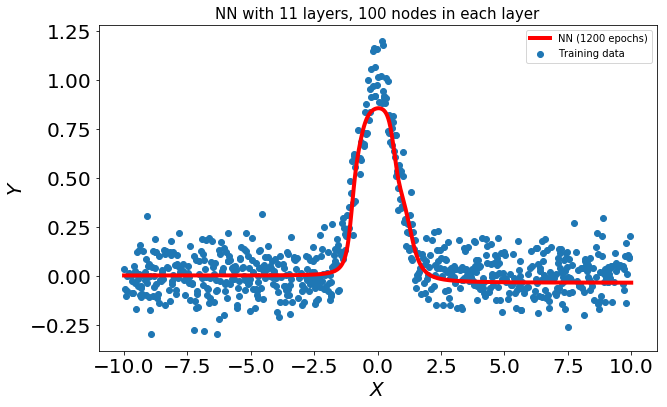

In [25]:
# use our model to predict in the range we want
num_epochs = f'{len(model2_history.epoch)}'

X_range = np.linspace(-10, 10, 500)
y_pred = model3.predict(X_range)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN ({num_epochs} epochs)')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title(f'NN with {len(model3_history.model.layers)} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=20)

ax.legend(loc=0)
plt.show()

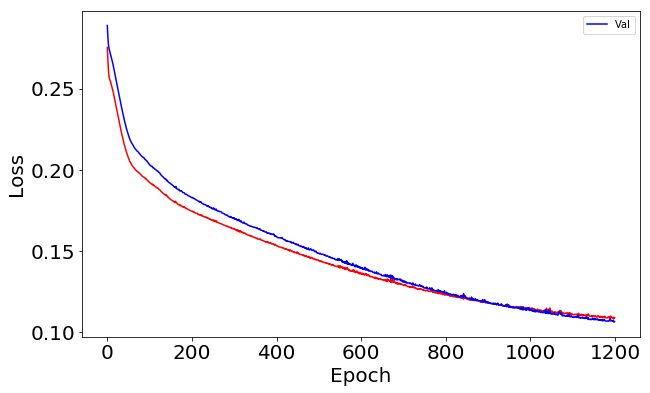

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model2_history.history['loss']), 'r')
ax.plot(np.sqrt(model2_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [27]:
# evaluate the training and testing performance of your model 
# note: you should extract and check both the loss function and your evaluation metric
score = model2.evaluate(X_train, Y_train, verbose=1)
print('Train loss:', score)
print('Train R2:', r2(Y_train, model2.predict(X_train)))

735/735 [==============================] - 0s 35us/step
Train loss: 0.011619159849804071
Train R2: 0.8187427858361475


In [ ]:
score = model2.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score)
print('Test R2:', r2(Y_test, model2.predict(X_test)))

We got a better score this time.

### Overfitting the model



<div class="exercise"><b>Exercise 5</b> </div>

Usually we want to avoid overfitting of the data to our model. But here we want to achive overfitting! So we can regularize! There are a few reasons why a model overfits. One is the lack of data. So we will try to overfit by reducing the data. Try that with model3 and see if it overfits.

In [ ]:
# Having very few points in our data
from sklearn.model_selection import train_test_split

In [ ]:
n_samples = 50 # set the number of samples to take for each dataset
test_size = 0.3 # set the proportion of data to hold out for testing

# define the function and add noise

def f_gauss(x):
    return np.exp(-x * x) + np.random.normal(loc=0, scale=.1, size = x.shape[0])

X = np.random.permutation(np.linspace(-10, 10, n_samples)) # choose some points from the function
Y = f_gauss(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train)

In [ ]:
# number of hidden nodes
H =  100
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model4 = models.Sequential()
# layer 0
model4.add(layers.Dense(H, input_dim=input_dim,  
                activation='tanh')) 
# layer 1
model4.add(layers.Dense(H,
                activation='tanh')) 
# layer 2
model4.add(layers.Dense(H,
                activation='tanh')) 
# layer 3
model4.add(layers.Dense(H,  
                activation='tanh')) 
# layer 4
model4.add(layers.Dense(H,  
                activation='tanh')) 
# layer 5
model4.add(layers.Dense(H,  
                activation='tanh')) 
# layer 6
model4.add(layers.Dense(H,  
                activation='tanh'))
# layer 7
model4.add(layers.Dense(H,  
                activation='tanh'))
# layer 8
model4.add(layers.Dense(H,  
                activation='tanh'))
# layer 9
model4.add(layers.Dense(H,  
                activation='tanh'))
# layer 10 - output
model4.add(layers.Dense(1, 
                activation='linear')) 

In [ ]:
# configure the model
model4.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# fit the model - INTENSIVE
model4_history = model4.fit(X_train, Y_train, batch_size=256, epochs=1500, verbose=1, \
                            shuffle = True, validation_split=0.2)

In [ ]:
# use our model to predict in the range we want
num_epochs = f'{len(model4_history.epoch)}'

X_range = np.linspace(-10, 10, 500)
y_pred = model4.predict(X_range)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN ({num_epochs} epochs)')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title(f'NN with {len(model4_history.model.layers)} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=20)

ax.legend(loc=0)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model4_history.history['loss']), 'r')
ax.plot(np.sqrt(model4_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Regularization

Let's try adding a regularizer in our model: `kernel_regularizer=regularizers.l2(l2)`. Also let's create a function that takes the number of layers and the l2 value as the input and creates the model.

Usage: `def create_dense([10, 20], l2=0.01)` will create a model with two hidden layers of 10 and 20 nodes each, l2=0.01 regularization and num_classes output nodes. 

In [ ]:
from keras import regularizers

In [ ]:
H =  100  # number of hidden nodes
input_dim = 1

model5 = models.Sequential()

# Input layer of the neural network with ReLU activation function and L2 regularization
model5.add(layers.Dense(H, input_dim=input_dim,  
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
           
# hidden layers
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
# output layer
model5.add(layers.Dense(1, 
                activation='linear')) 

In [ ]:
# configure the model
model5.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# fit the model - INTENSIVE
model5_history = model5.fit(X_train, Y_train, batch_size=256, epochs=1500, verbose=1, \
                            shuffle = True, validation_split=0.2)

In [ ]:
# use our model to predict in the range we want
num_epochs = f'{len(model5_history.epoch)}'

X_range = np.linspace(-10, 10, 500)
y_pred = model5.predict(X_range)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN ({num_epochs} epochs)')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title(f'NN with {len(model5_history.model.layers)} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=20)

ax.legend(loc=0)
plt.show()

That seems very good. Let's see the $R^2$

In [ ]:
from sklearn.metrics import r2_score as r2

In [ ]:
score = model5.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score)
print('Test R2:', r2(Y_test, model5.predict(X_test)))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model5_history.history['loss']), 'r')
ax.plot(np.sqrt(model5_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)